# Project Description

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')

In [4]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [5]:
df.shape

(1000, 40)

There are 1000 rows and 40 columns available in this dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In this dataset there are 2 float64, 17 int64 and 21 objects datatypes available

In [7]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

Except one column there is no null value present in this dataset. So, I will remove this column

In [8]:
df=df.drop('_c39', axis=1)

In [9]:
for i in df.columns:
    print(df[i].value_counts(), ('\n'))

194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: months_as_customer, Length: 391, dtype: int64 

43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: age, dtype: int64 

521585    1
687755    1
674485    1
223404    1
991480    1
         ..
563878    1
620855    1
583169    1
337677    1
556080    1
Name: policy_number, Length: 1000, dtype: int64 

01-01-2006    3
28-04-1992    3
05-08-1992    3
14-12-1991    2
09-08-2004    2
             ..
03-06-2014    1
12-12-1998    1
18-02-1999    1
30-10-1997    1
11-11-1996    1
Name: policy_bind_date, Length: 951, dtype: int64

In [10]:
df=df.drop(['policy_number','policy_bind_date','umbrella_limit','insured_zip','insured_relationship','incident_date','incident_location'],axis=1)

In [11]:
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,OH,250/500,1000,1406.91,MALE,MD,craft-repair,sleeping,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,IN,250/500,2000,1197.22,MALE,MD,machine-op-inspct,reading,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,OH,100/300,2000,1413.14,FEMALE,PhD,sales,board-games,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,IL,250/500,2000,1415.74,FEMALE,PhD,armed-forces,board-games,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,IL,500/1000,1000,1583.91,MALE,Associate,sales,board-games,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [13]:
#I am spliting 'policy_csl' columns into two columns.
df[['policy_csl_1','policy_csl_2']]=df['policy_csl'].str.split('/', expand=True)

In [14]:
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_csl_1,policy_csl_2
0,328,48,OH,250/500,1000,1406.91,MALE,MD,craft-repair,sleeping,...,71610,6510,13020,52080,Saab,92x,2004,Y,250,500
1,228,42,IN,250/500,2000,1197.22,MALE,MD,machine-op-inspct,reading,...,5070,780,780,3510,Mercedes,E400,2007,Y,250,500
2,134,29,OH,100/300,2000,1413.14,FEMALE,PhD,sales,board-games,...,34650,7700,3850,23100,Dodge,RAM,2007,N,100,300
3,256,41,IL,250/500,2000,1415.74,FEMALE,PhD,armed-forces,board-games,...,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,250,500
4,228,44,IL,500/1000,1000,1583.91,MALE,Associate,sales,board-games,...,6500,1300,650,4550,Accura,RSX,2009,N,500,1000


In [15]:
#Now I am removing 'policy_csl' column which is not required now
df=df.drop('policy_csl',axis=1)

In [16]:
df.shape

(1000, 33)

After removing unnecessary columns Now I have 33 columns remain.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   object 
 3   policy_deductable            1000 non-null   int64  
 4   policy_annual_premium        1000 non-null   float64
 5   insured_sex                  1000 non-null   object 
 6   insured_education_level      1000 non-null   object 
 7   insured_occupation           1000 non-null   object 
 8   insured_hobbies              1000 non-null   object 
 9   capital-gains                1000 non-null   int64  
 10  capital-loss                 1000 non-null   int64  
 11  incident_type                1000 non-null   object 
 12  collision_type               1000 non-null   object 
 13  incident_severity  

In [22]:
#Converting object to integer datatype of 'policy_csl_1' & 'policy_csl_2'
df['policy_csl_1']=df['policy_csl_1'].astype(int) 

In [23]:
df['policy_csl_2']=df['policy_csl_2'].astype(int)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   object 
 3   policy_deductable            1000 non-null   int64  
 4   policy_annual_premium        1000 non-null   float64
 5   insured_sex                  1000 non-null   object 
 6   insured_education_level      1000 non-null   object 
 7   insured_occupation           1000 non-null   object 
 8   insured_hobbies              1000 non-null   object 
 9   capital-gains                1000 non-null   int64  
 10  capital-loss                 1000 non-null   int64  
 11  incident_type                1000 non-null   object 
 12  collision_type               1000 non-null   object 
 13  incident_severity  

In [25]:
df.describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,policy_csl_1,policy_csl_2
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1136.000000,1256.406150,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,272.650000,580.200000
std,115.113174,9.140287,611.864673,244.167395,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,161.603196,287.420547
min,0.000000,19.000000,500.000000,433.330000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,100.000000,300.000000
25%,115.750000,32.000000,500.000000,1089.607500,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,100.000000,300.000000
50%,199.500000,38.000000,1000.000000,1257.200000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,250.000000,500.000000
75%,276.250000,44.000000,2000.000000,1415.695000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,500.000000,1000.000000
max,479.000000,64.000000,2000.000000,2047.590000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,500.000000,1000.000000


In [30]:
contcol=list(df.select_dtypes(exclude='object'))

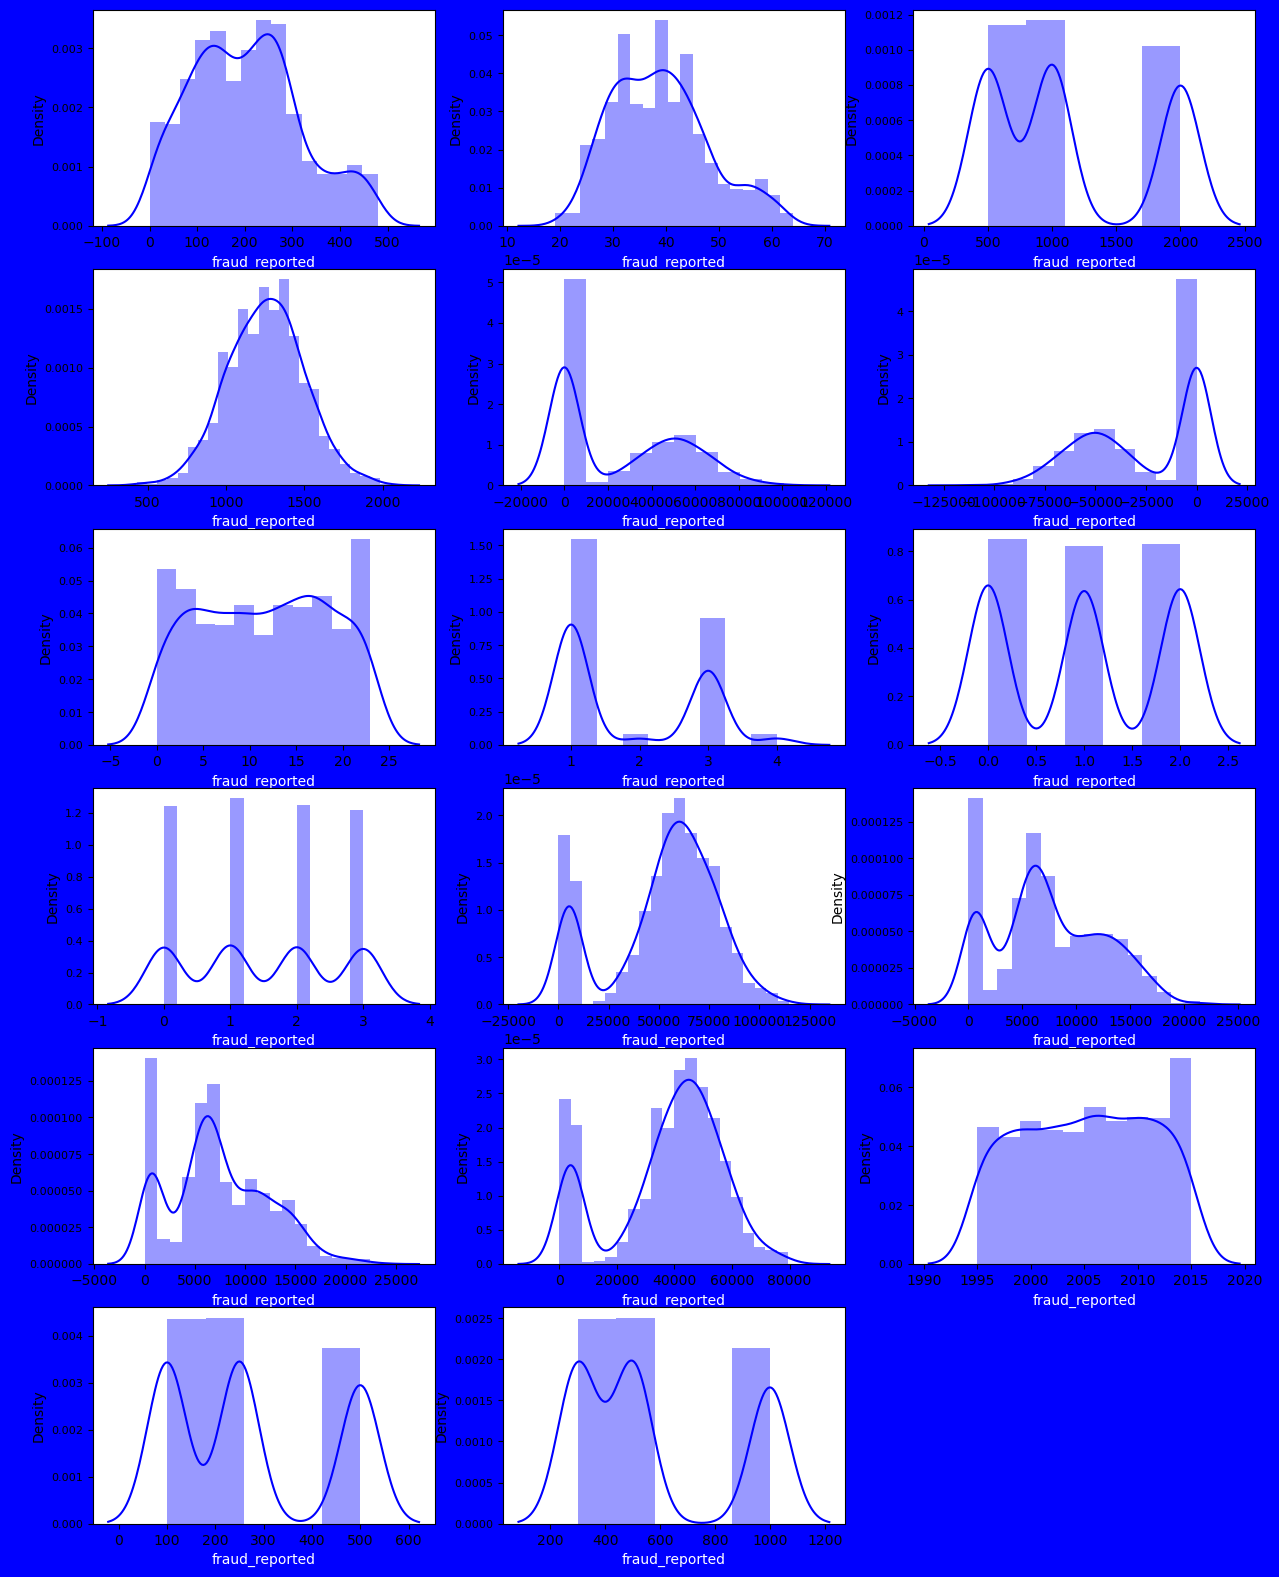

In [53]:
#Checking outliers by ploting dist plot
plt.figure(figsize=(15,50), facecolor='blue')
plotnumber=1

for columns in df[contcol]:
    if plotnumber<=25:
        ax=plt.subplot(15,3,plotnumber)
        sns.distplot(df[columns], color='b')
        plt.xlabel(i, fontsize=10, color='w')
        plt.yticks(rotation=0, fontsize=8)
    
    plotnumber+=1
plt.show()

I can't see much outliers so, I will try to check on boxplot

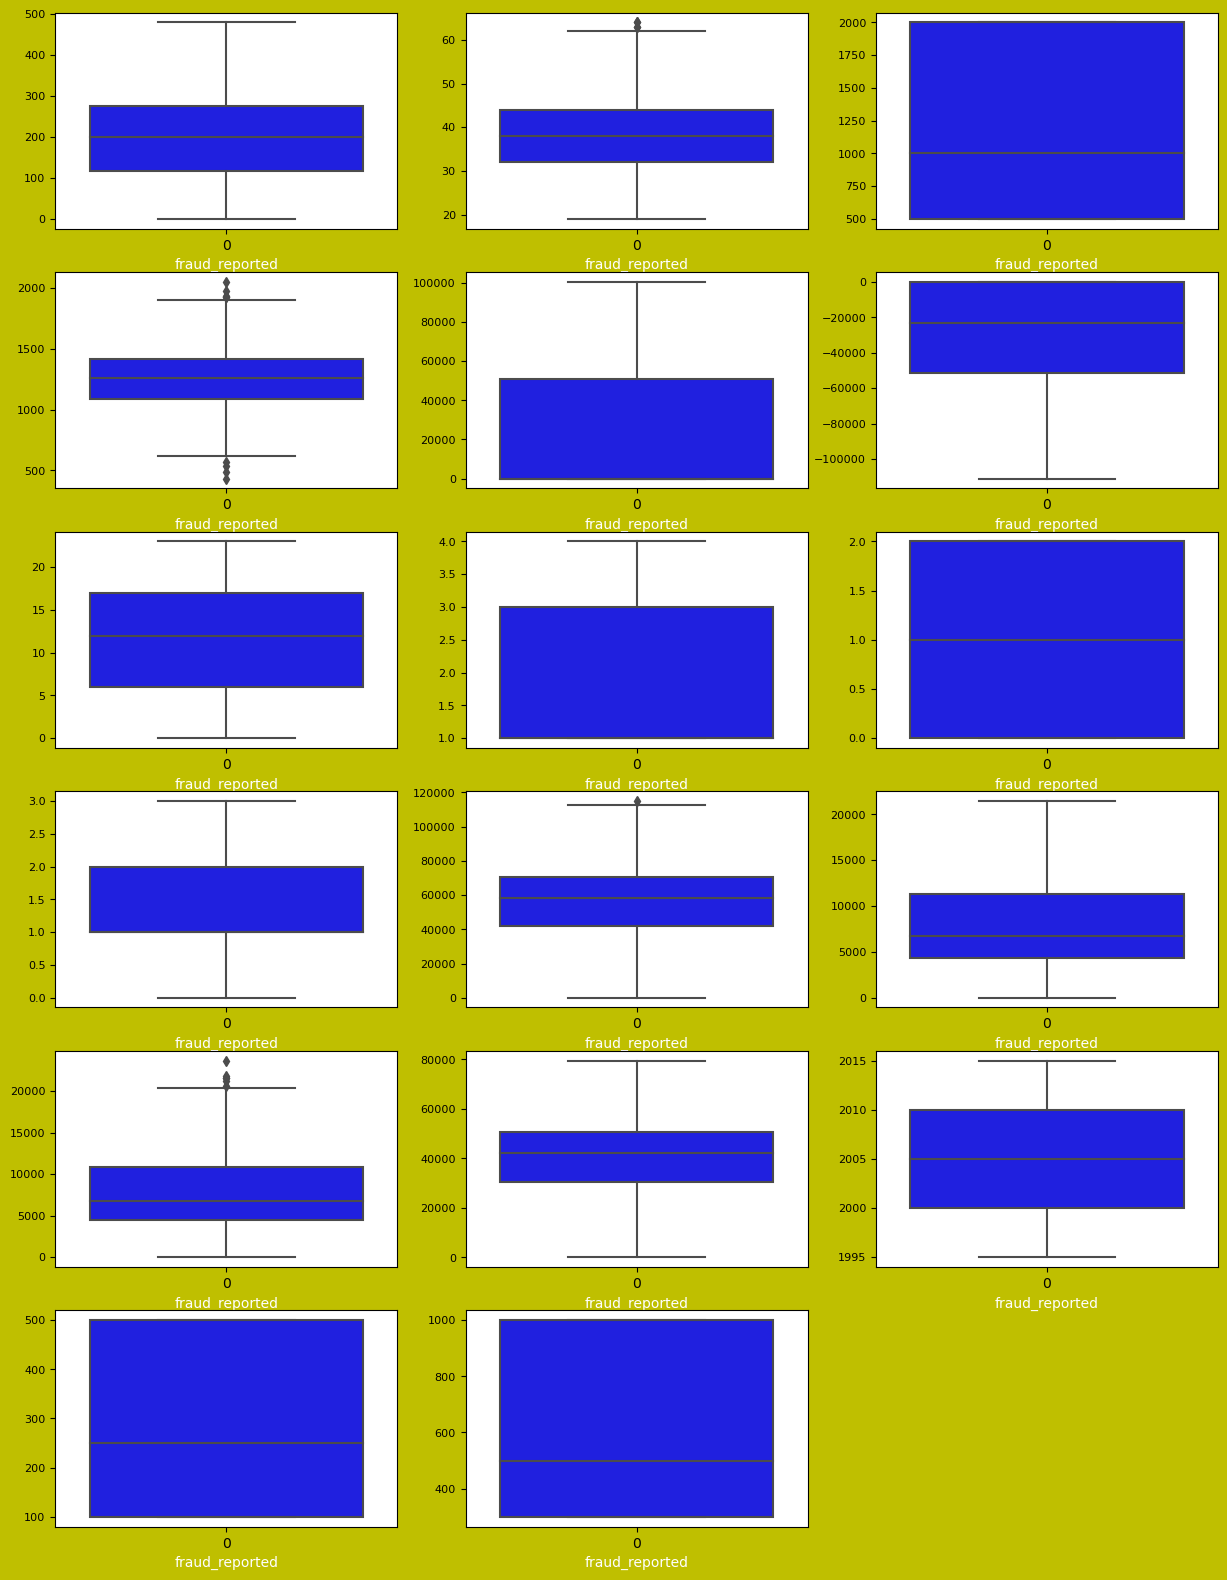

In [56]:
plt.figure(figsize=(15,50), facecolor='y')
plotnumber=1

for columns in df[contcol]:
    if plotnumber<=25:
        ax=plt.subplot(15,3,plotnumber)
        sns.boxplot(df[columns], color='b')
        plt.xlabel(i, fontsize=10, color='w')
        plt.yticks(rotation=0, fontsize=8)
    
    plotnumber+=1
plt.show()

I think there is not any outlier present in this dataset. So, I am going to convert object datatype to continues data 

In [58]:
cat=list(df.select_dtypes(include='object'))

In [59]:
for i in df[cat]:
    print(df[i].value_counts(), ('\n'))

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64 

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64 

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64 

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64 

reading           64
exercise          57
paintball         57
bungie-jumping    56
movies            55
golf              55
camping           55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
ch

In [63]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [64]:
for i in df[cat]:
    df1=le.fit_transform(df[i])
    df[i]=df1

In [65]:
df.head()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,insured_sex,insured_education_level,insured_occupation,insured_hobbies,capital-gains,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_csl_1,policy_csl_2
0,328,48,2,1000,1406.91,1,4,2,17,53300,...,71610,6510,13020,52080,10,1,2004,1,250,500
1,228,42,1,2000,1197.22,1,4,6,15,0,...,5070,780,780,3510,8,12,2007,1,250,500
2,134,29,2,2000,1413.14,0,6,11,2,35100,...,34650,7700,3850,23100,4,30,2007,0,100,300
3,256,41,0,2000,1415.74,0,6,1,2,48900,...,63400,6340,6340,50720,3,34,2014,1,250,500
4,228,44,0,1000,1583.91,1,0,11,2,66000,...,6500,1300,650,4550,0,31,2009,0,500,1000


To detect multicollinearity I will calculate the variance inflation factor (VIF) value for each independent variable.

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [67]:
x=df.drop('fraud_reported', axis=1)
y=df.fraud_reported

In [68]:
x_scaled=scaler.fit_transform(x)

In [69]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor (x_scaled, i) for i in range(x_scaled.shape[1])]
vif['feature']=x.columns
vif

,vif,feature
0,6.834715,months_as_customer
1,6.844738,age
2,1.031281,policy_state
3,1.035183,policy_deductable
4,1.036933,policy_annual_premium
5,1.029958,insured_sex
6,1.035031,insured_education_level
7,1.012514,insured_occupation
8,1.041577,insured_hobbies
9,1.033172,capital-gains


Two columns i.e. policy_csl_1 and policy_csl_2 have highest vif value so, need to remove from the dataset

In [70]:
df=df.drop(['policy_csl_1','policy_csl_2'], axis=1)

Now, I am going to build the classification model base on problem statement

In [71]:
x=df.drop('fraud_reported', axis=1)
y=df.fraud_reported

In [72]:
x_scaled=scaler.fit_transform(x)

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [74]:
etc=ExtraTreesClassifier()
rfc=RandomForestClassifier()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
lr=LogisticRegression()
gbc=GradientBoostingClassifier()
abc=AdaBoostClassifier()
bc=BaggingClassifier()

In [75]:
mdl=[rfc,etc,lr,knn,dtc,gbc,abc,bc]

In [76]:
for i in range(1, 200):
    x_train, x_test, y_train, y_test=train_test_split(x_scaled, y, test_size=0.25, random_state=i)
    for i in mdl:
        i.fit(x_train, y_train)
        y_pred=i.predict(x_train)
        tacc=accuracy_score(y_train, y_pred)
        print('Accuracy Score of Train Data:',tacc*100)
        pred=i.predict(x_test)
        acc=accuracy_score(y_test, pred)
        print('Accuracy Score of Test Data:',acc*100)
        print('Model Name: ',i)
        print('\n')
    break

Accuracy Score of Train Data: 100.0
Accuracy Score of Test Data: 72.8
Model Name:  RandomForestClassifier()


Accuracy Score of Train Data: 100.0
Accuracy Score of Test Data: 72.39999999999999
Model Name:  ExtraTreesClassifier()


Accuracy Score of Train Data: 79.73333333333333
Accuracy Score of Test Data: 74.0
Model Name:  LogisticRegression()


Accuracy Score of Train Data: 80.4
Accuracy Score of Test Data: 72.0
Model Name:  KNeighborsClassifier()


Accuracy Score of Train Data: 100.0
Accuracy Score of Test Data: 78.4
Model Name:  DecisionTreeClassifier()


Accuracy Score of Train Data: 97.46666666666667
Accuracy Score of Test Data: 82.39999999999999
Model Name:  GradientBoostingClassifier()


Accuracy Score of Train Data: 84.66666666666667
Accuracy Score of Test Data: 78.8
Model Name:  AdaBoostClassifier()


Accuracy Score of Train Data: 98.13333333333333
Accuracy Score of Test Data: 83.2
Model Name:  BaggingClassifier()




All model has given the best accuracy score.So, I will try to check CV score of all the models

In [77]:
models={'RandomForestClassifier':rfc,'ExtraTreesClassifier':etc,'LogisticRegression':lr,'KNeighborsClassifier':knn,'DecisionTreeClassifier':dtc,'GradientBoostingClassifier':gbc,'AdaBoostClassifier':abc,'BaggingClassifier':bc}

In [78]:
#Cheking CV Score by using for loop on all models.
for i in mdl:
    score=cross_val_score(i, x_scaled,y)
    print('Model Name is :', i)
    print('Score: ',score)
    print('Score Mean: ',score.mean())
    for name, model in models.items():
        model.fit(x_train, y_train)
        ypred=model.predict(x_test)
    print("diffrent Between Accuracy Score and CV score is :" ,accuracy_score(y_test, ypred)-(score.mean()))
    print("\n")

Model Name is : RandomForestClassifier()
Score:  [0.785 0.735 0.75  0.785 0.81 ]
Score Mean:  0.773
diffrent Between Accuracy Score and CV score is : 0.02300000000000002


Model Name is : ExtraTreesClassifier()
Score:  [0.78  0.74  0.725 0.795 0.775]
Score Mean:  0.763
diffrent Between Accuracy Score and CV score is : 0.017000000000000015


Model Name is : LogisticRegression()
Score:  [0.79  0.75  0.705 0.8   0.8  ]
Score Mean:  0.7689999999999999
diffrent Between Accuracy Score and CV score is : 0.04300000000000015


Model Name is : KNeighborsClassifier()
Score:  [0.74  0.68  0.705 0.76  0.73 ]
Score Mean:  0.723
diffrent Between Accuracy Score and CV score is : 0.08900000000000008


Model Name is : DecisionTreeClassifier()
Score:  [0.75  0.79  0.75  0.79  0.775]
Score Mean:  0.771
diffrent Between Accuracy Score and CV score is : 0.013000000000000012


Model Name is : GradientBoostingClassifier()
Score:  [0.815 0.775 0.79  0.86  0.845]
Score Mean:  0.817
diffrent Between Accuracy Sco

GradientBoostingClassifier has given the best CV Score. So, I will hypertune this model and chcek the accuracy score.

In [80]:
from sklearn.model_selection import GridSearchCV

In [81]:
param={'learning_rate':[0.001,0.01,0.02],
       'max_depth':[3,5,8],
      'max_features':['log2','sqrt'],
      "min_samples_leaf":[5,6,7],
      'criterion': ['friedman_mse','mae'],
      "n_estimators":[5,7,8]}

In [82]:
grid=GridSearchCV(GradientBoostingClassifier(), param_grid=param)
grid.fit(x_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'mae'],
                         'learning_rate': [0.001, 0.01, 0.02],
                         'max_depth': [3, 5, 8],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [5, 6, 7],
                         'n_estimators': [5, 7, 8]})

In [83]:
grid.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.001,
 'max_depth': 3,
 'max_features': 'log2',
 'min_samples_leaf': 5,
 'n_estimators': 5}

In [85]:
final_model=GradientBoostingClassifier(criterion= 'friedman_mse',learning_rate= 0.001, max_depth= 3, max_features='log2',min_samples_leaf= 5,n_estimators= 5)

In [86]:
final_model.fit(x_train, y_train)
ypred=final_model.predict(x_test)
accuracy_score(y_test, pred)

0.832

Final Score of final_model is 83% after applying GridSearchCV.

In [88]:
import pickle
pickle.dump(final_model, open('Insurance Claim Fraud Detection.pkl','wb'))